In [114]:
%matplotlib inline

In [115]:
import matplotlib.pyplot as plt

In [116]:
import pandas as pd
import numpy as np


In [117]:
df = pd.read_csv('superbowl.csv')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        54 non-null     object
 1   SB          54 non-null     object
 2   Winner      54 non-null     object
 3   Winner Pts  54 non-null     int64 
 4   Loser       54 non-null     object
 5   Loser Pts   54 non-null     int64 
 6   MVP         54 non-null     object
 7   Stadium     54 non-null     object
 8   City        54 non-null     object
 9   State       54 non-null     object
dtypes: int64(2), object(8)
memory usage: 4.3+ KB


In [119]:
df.head()

,Date,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State
0,Feb 2 2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida
1,Feb 3 2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
2,Feb 4 2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota
3,Feb 5 2017,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas
4,Feb 7 2016,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California


In [120]:
# Notice that mean between points number of winner is almost double of points number of loser
df.describe()

,Winner Pts,Loser Pts
count,54.000000,54.000000
mean,30.111111,16.203704
std,9.766455,7.413348
min,13.000000,3.000000
25%,23.250000,10.000000
50%,30.500000,17.000000
75%,35.000000,21.000000
max,55.000000,33.000000


In [121]:
df.drop(['SB', 'Winner', 'Loser', 'MVP', 'Stadium', 'City', 'State'], axis='columns', inplace=True)

In [122]:
df.head()

,Date,Winner Pts,Loser Pts
0,Feb 2 2020,31,20
1,Feb 3 2019,13,3
2,Feb 4 2018,41,33
3,Feb 5 2017,34,28
4,Feb 7 2016,24,10


In [123]:
df['Total Points'] = df['Winner Pts'] + df['Loser Pts']
df.head()

,Date,Winner Pts,Loser Pts,Total Points
0,Feb 2 2020,31,20,51
1,Feb 3 2019,13,3,16
2,Feb 4 2018,41,33,74
3,Feb 5 2017,34,28,62
4,Feb 7 2016,24,10,34


In [124]:
df['year'] = pd.to_numeric(df['Date'].str.slice(start=-4))
df.drop('Date', axis=1, inplace=True)
df.head()

,Winner Pts,Loser Pts,Total Points,year
0,31,20,51,2020
1,13,3,16,2019
2,41,33,74,2018
3,34,28,62,2017
4,24,10,34,2016


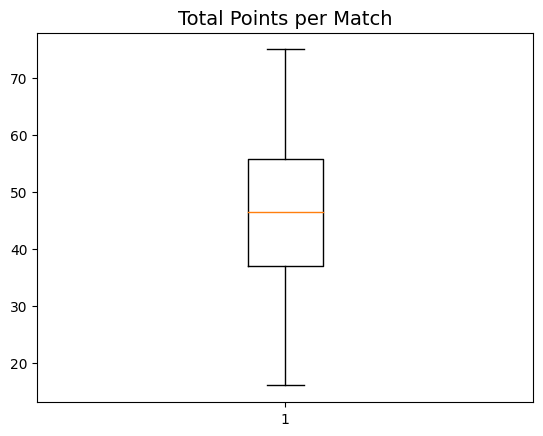

In [125]:
plt.boxplot(df['Total Points'])
plt.title("Total Points per Match", loc="center", fontsize=14)
plt.show()

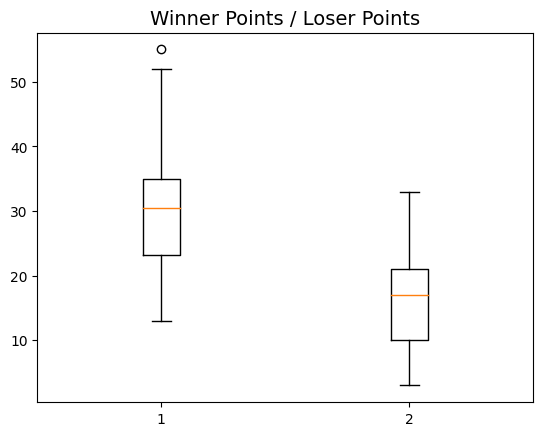

In [126]:
plt.boxplot([df["Winner Pts"], df["Loser Pts"]])
plt.title("Winner Points / Loser Points", loc="center", fontsize=14)
plt.show()

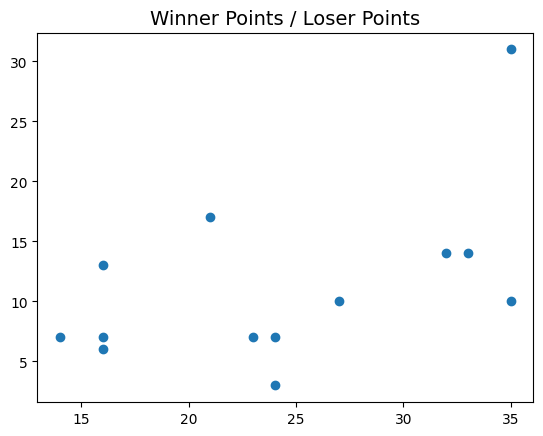

In [131]:
plt.scatter(df.loc[df['year'] < 1980]['Winner Pts'], df.loc[df['year'] < 1980]['Loser Pts'])
plt.title("Winner Points / Loser Points 60's - 70's", loc="center", fontsize=14)
plt.show()

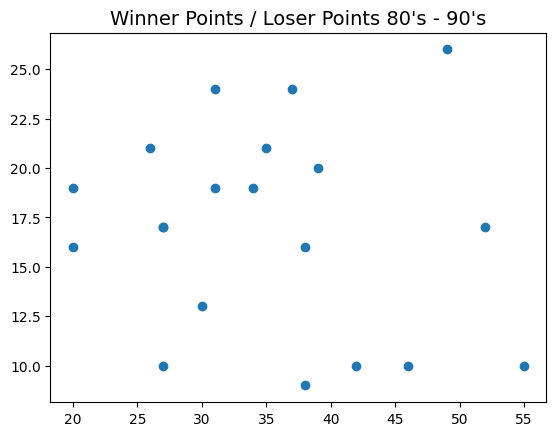

In [140]:
plt.scatter(df.loc[(df['year'] >= 1980) & (df['year'] < 2000)]['Winner Pts'], df.loc[(df['year'] >= 1980) & (df['year'] < 2000)]['Loser Pts'])
plt.title("Winner Points / Loser Points 80's - 90's", loc="center", fontsize=14)
plt.show()

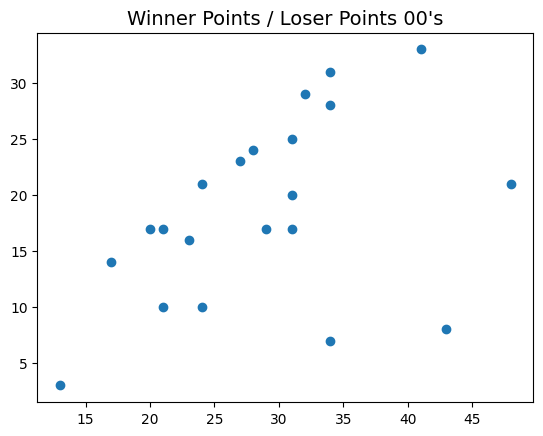

In [141]:

plt.scatter(df.loc[(df['year'] >= 2000)]['Winner Pts'], df.loc[(df['year'] >= 2000)]['Loser Pts'])
plt.title("Winner Points / Loser Points 00's", loc="center", fontsize=14)
plt.show()

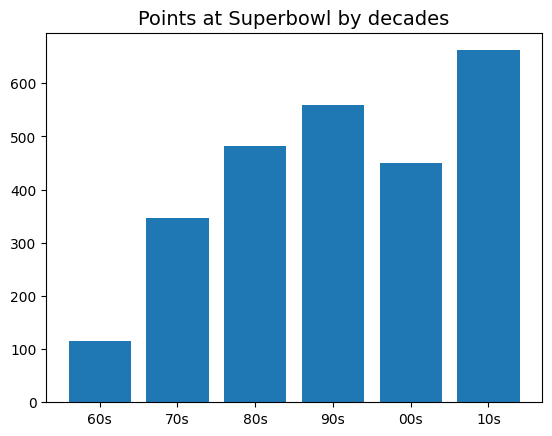

In [143]:
fig, ax = plt.subplots()
decades = ['60s', '70s', '80s', '90s', '00s', '10s']
points = [0, 0, 0, 0, 0, 0]
index = 0
for year in df['year']:
    if year < 1970:
        points[0] += df.loc[index]["Total Points"]
    if year >= 1970 and year < 1980:
        points[1] += df.loc[index]["Total Points"]
    elif year >= 1980 and year < 1990:
        points[2] += df.loc[index]["Total Points"]
    elif year >= 1990 and year < 2000:
        points[3] += df.loc[index]["Total Points"]
    elif year >= 2000 and year < 2010:
        points[4] += df.loc[index]["Total Points"]
    else:
        points[5] += df.loc[index]["Total Points"]
    index += 1

ax.bar(decades, points)
plt.title("Points at Superbowl by decades", loc="center", fontsize=14)
plt.show()